# Boston 주택 가격 예측
Boston 주택 가격 예측 모델에서 사용되는 데이터셋은 보스턴 시의 주택 가격 데이터셋으로, 주택의 여러 요건과 가격 정보가 포함되어 있습니다.
- 데이터셋의 feature에 대한 설명

|feature|설명|
|---|---|
|CRIM|자치시별 1인당 범죄율|
|ZN|25,000 평방피트를 초과하는 거주지역의 비율|
|INDUS|비소매상업지역이 점유하고 있는 토지의 비율|
|CHAS|찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)|
|NOX|10ppm 당 농축 일산화질소|
|RM|주택 1 가구당 평균 방의 개수|
|AGE|1940년 이전에 건축된 소유주택의 비율|
|DIS|5개의 보스턴 직업센터까지의 접근성 지수|
|RAD|방사형 도로까지의 접근성 지수|
|TAX|10,000 달러당 재산세율|
|PTRATIO|자치시(town)별 학생/교사 비율|
|B|$1000(Bk−0.63)^2$, 여기서$Bk$는 자치시별 흑인의 비율을 말함|
|LSTAT|모집단의 하위계층의 비율(%)|
|MEDV|본인 소유의 주택가격(중앙값)(단위: $1,000)|

## 1. 데이터 로드 및 전처리
- 먼저 데이터를 불러와 확인해 보고 전처리를 해 봅시다.
- 데이터셋은 keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용합니다.

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [6]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [13]:
import numpy as np
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
train_mean = train_data.mean(axis=0)
train_std = train_data.std(axis=0)

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data = (train_data - train_mean)/train_std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = (test_data - train_mean)/train_std

In [14]:
train_data.mean(axis=0), train_data.std(axis=0)

(array([-1.01541438e-16,  1.09923072e-17,  1.74337992e-15, -1.26686340e-16,
        -5.25377321e-15,  6.41414864e-15,  2.98441140e-16,  4.94653823e-16,
         1.12671149e-17, -1.98136337e-16,  2.36686358e-14,  5.95679996e-15,
         6.13920356e-16]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

## 2. 모델 구성 및 컴파일
주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성합니다.

In [15]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential()

model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='relu', name=f'dense_{1}'))
model.add(layers.Dense(32, activation='relu', name=f'dense_{2}'))
model.add(layers.Dense(16, activation='relu', name=f'dense_{3}'))
model.add(layers.Dense(1, activation='linear', name=f'dense_{4}'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='mse',
              optimizer='Adam',
              metrics=['mae'])

## 3. 모델 학습
epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화

In [17]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels,
                    epochs=60,
                    batch_size=128,
                    validation_data=(test_data, test_labels))

Epoch 1/60
4/4 [==============================] - 1s 53ms/step - loss: 587.1121 - mae: 22.3791 - val_loss: 604.6077 - val_mae: 22.8025
Epoch 2/60
4/4 [==============================] - 0s 12ms/step - loss: 572.8311 - mae: 22.0569 - val_loss: 591.0644 - val_mae: 22.4990
Epoch 3/60
4/4 [==============================] - 0s 8ms/step - loss: 559.0193 - mae: 21.7416 - val_loss: 577.2321 - val_mae: 22.1885
Epoch 4/60
4/4 [==============================] - 0s 8ms/step - loss: 545.0439 - mae: 21.4154 - val_loss: 562.0756 - val_mae: 21.8406
Epoch 5/60
4/4 [==============================] - 0s 8ms/step - loss: 529.6783 - mae: 21.0536 - val_loss: 544.8815 - val_mae: 21.4383
Epoch 6/60
4/4 [==============================] - 0s 8ms/step - loss: 512.0276 - mae: 20.6274 - val_loss: 525.1428 - val_mae: 20.9676
Epoch 7/60
4/4 [==============================] - 0s 9ms/step - loss: 491.9951 - mae: 20.1325 - val_loss: 502.4506 - val_mae: 20.4101
Epoch 8/60
4/4 [==============================] - 0s 11ms/st

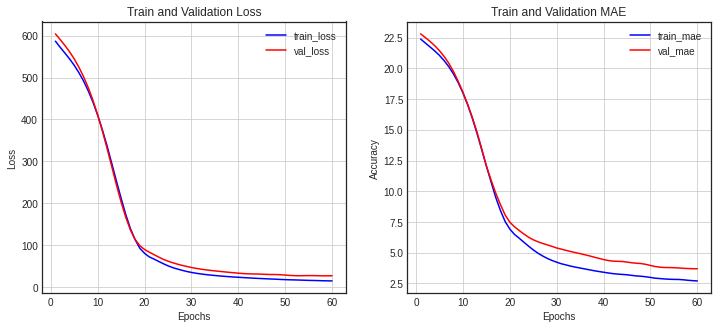

In [18]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 4. 모델 평가 및 예측
테스트 데이터를 가져와 모델 성능을 평가

In [19]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 26.5894 - mae: 3.6970


[26.589427947998047, 3.6970367431640625]